In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.layers import Dense
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential


Using TensorFlow backend.


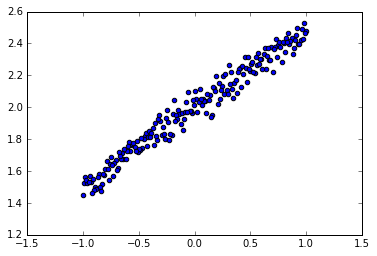

In [3]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

In [4]:
X_train, Y_train = X[:160], Y[:160]     # first 160 data points
X_test, Y_test = X[160:], Y[160:]       # last 40 data points

# build a neural network from the 1st layer to the last layer
model = Sequential()

model.add(Dense(units=1, input_dim=1)) 
# model.add(Dense(units=10, input_dim=1)) 

# model.add(Dense(units=1, 
#                 kernel_initializer='uniform',
#                 activation='sigmoid'))

# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

In [9]:
train_history =model.fit(x=X_train, 
                         y=Y_train, 
                         validation_split=0.1, 
                         epochs=200, 
                         batch_size=30,verbose=2)

Train on 144 samples, validate on 16 samples
Epoch 1/200
0s - loss: 0.4959 - val_loss: 0.4281
Epoch 2/200
0s - loss: 0.4057 - val_loss: 0.3499
Epoch 3/200
0s - loss: 0.3318 - val_loss: 0.2860
Epoch 4/200
0s - loss: 0.2715 - val_loss: 0.2339
Epoch 5/200
0s - loss: 0.2224 - val_loss: 0.1914
Epoch 6/200
0s - loss: 0.1822 - val_loss: 0.1565
Epoch 7/200
0s - loss: 0.1493 - val_loss: 0.1281
Epoch 8/200
0s - loss: 0.1225 - val_loss: 0.1049
Epoch 9/200
0s - loss: 0.1006 - val_loss: 0.0859
Epoch 10/200
0s - loss: 0.0827 - val_loss: 0.0704
Epoch 11/200
0s - loss: 0.0681 - val_loss: 0.0577
Epoch 12/200
0s - loss: 0.0562 - val_loss: 0.0474
Epoch 13/200
0s - loss: 0.0464 - val_loss: 0.0390
Epoch 14/200
0s - loss: 0.0384 - val_loss: 0.0321
Epoch 15/200
0s - loss: 0.0319 - val_loss: 0.0265
Epoch 16/200
0s - loss: 0.0266 - val_loss: 0.0219
Epoch 17/200
0s - loss: 0.0222 - val_loss: 0.0181
Epoch 18/200
0s - loss: 0.0187 - val_loss: 0.0151
Epoch 19/200
0s - loss: 0.0158 - val_loss: 0.0126
Epoch 20/200
0

In [31]:
# training
print('Training -----------')
for step in range(301):  # 迴圈就是 epochs
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
('train cost: ', 0.54694903)
('train cost: ', 0.015779611)
('train cost: ', 0.0037667684)
('train cost: ', 0.0028739306)


In [11]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s
('test cost:', 0.0032642967998981476)
('Weights=', array([[ 0.49150676]], dtype=float32), '\nbiases=', array([ 2.0045886], dtype=float32))


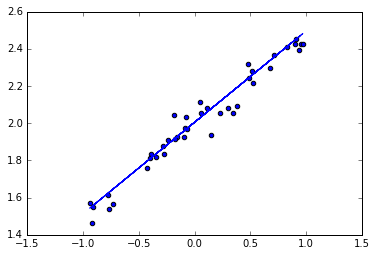

In [10]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

In [7]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

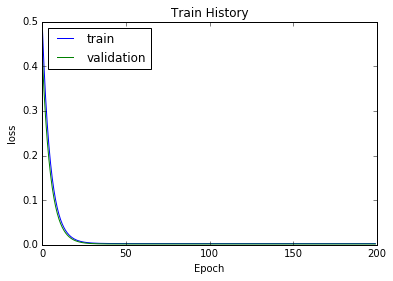

In [11]:
show_train_history(train_history,'loss','val_loss')